The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
/home/jovyan/.local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_710268/1570425706.py:21: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/jovyan/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


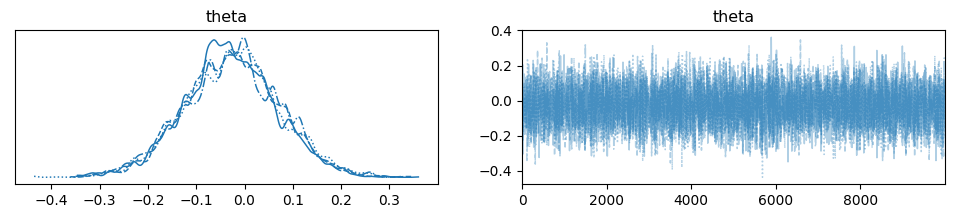

In [4]:
#!pip install pymc3

import pymc3 as pm
import matplotlib.pyplot as plt

# Define the model context
with pm.Model() as model:
    # Prior distribution for the unknown parameter
    theta = pm.Normal('theta', mu=0, sigma=1)
    
    # Likelihood (sampling distribution) of observations
    observations = pm.Normal('observations', mu=theta, sigma=1, observed=np.random.randn(100))
    
    # Setup Metropolis Hastings Sampler
    step = pm.Metropolis()
    
    # Sample from the posterior using the Metropolis-Hastings algorithm
    trace = pm.sample(10000, step=step)

# Plot the trace
pm.traceplot(trace)
plt.show()
